In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [5]:
mon_sales = pd.read_csv('monthly_sales.csv')
daily_sales = pd.read_csv('daily_sales.csv')

In [166]:
print(mon_sales.shape)
mon_sales.head()
daily_sales.head()

(45, 27)


,weekday,Day,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,...,FF-C,Hamburger,chicken_fillet,Fillet_fish,north_east,south_west,north_west,south_east,central,Total sales
0,Friday,1/1/2016,37240,16077,8446,39249,16565,10204,37271,16819,...,11232,185416,76915,51540,61763,66018,64014,61656,60420,313871
1,Saturday,1/2/2016,36258,14726,7950,38106,14003,7316,35021,14705,...,9152,182961,72779,41451,58934,59425,58754,59492,60586,297191
2,Sunday,1/3/2016,37007,15103,8397,35494,15987,8683,35369,16591,...,8406,178589,77157,40602,60507,60164,60065,55794,59818,296348
3,Monday,1/4/2016,37590,16413,9537,33666,15114,8429,37993,14535,...,7940,182018,76289,42141,63540,57209,60562,59330,59807,300448
4,Tuesday,1/5/2016,38036,16199,10123,33528,13721,10085,37854,14590,...,8607,182916,75062,47568,64358,57334,62323,60667,60864,305546


In [176]:
print(daily_sales.shape)
daily_sales.head()
daily_sales.weekday.value_counts()
Weekday_sort = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
series_1 = daily_sales.groupby('weekday')['north_east'].mean().reindex(Weekday_sort)
series_2 = daily_sales.groupby('weekday')['south_west'].mean().reindex(Weekday_sort)
series_3 = daily_sales.groupby('weekday')['north_west'].mean().reindex(Weekday_sort)
series_4 = daily_sales.groupby('weekday')['south_east'].mean().reindex(Weekday_sort)
series_5 = daily_sales.groupby('weekday')['central'].mean().reindex(Weekday_sort)
series_6 = daily_sales.groupby('weekday')['Total sales'].mean().reindex(Weekday_sort)





#plt.plot(series_1)
#plt.plot(series_2)
#plt.plot(series_3)
#plt.plot(series_4)
#plt.plot(series_5)


series_5.tolist()

(31, 26)


[60925.0, 59202.25, 59679.5, 59538.25, 62418.6, 59675.0, 58241.0]

In [154]:
hamburgers_col = []
chcick_fillet_col = []
fish_fillet_col = []
north_east_col = []
south_west_col = []
north_west_col = []
south_east_col = []
central_col = []
eroro = []
for i in daily_sales.columns:
    if len(i.split('-')) == 2:
        if i.split('-')[0] == 'HM':
            hamburgers_col.append(i)
        elif i.split('-')[0] == 'CF':
            chcick_fillet_col.append(i)
        elif i.split('-')[0] == 'FF':
            fish_fillet_col.append(i)
        if i.split('-')[1] == 'NE':
            north_east_col.append(i)
        elif i.split('-')[1] == 'SW':
            south_west_col.append(i)
        elif i.split('-')[1] == 'NW':
            north_west_col.append(i)
        elif i.split('-')[1] == 'SE':
            south_east_col.append(i)
        elif i.split('-')[1] == 'C':
            central_col.append(i)

daily_sales['Hamburger'] = daily_sales[hamburgers_col].sum(axis = 1)
daily_sales['chicken_fillet'] = daily_sales[chcick_fillet_col].sum(axis = 1)
daily_sales['Fillet_fish'] = daily_sales[fish_fillet_col].sum(axis = 1)
daily_sales['north_east'] = daily_sales[north_east_col].sum(axis = 1)
daily_sales['south_west'] = daily_sales[south_west_col].sum(axis = 1)
daily_sales['north_west'] = daily_sales[north_west_col].sum(axis = 1)
daily_sales['south_east'] = daily_sales[south_east_col].sum(axis = 1)
daily_sales['central'] = daily_sales[central_col].sum(axis = 1)
daily_sales['Total sales'] = daily_sales['Hamburger']+daily_sales['chicken_fillet']+daily_sales['Fillet_fish']
daily_sales.head(10)

,weekday,Day,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,...,FF-C,Hamburger,chicken_fillet,Fillet_fish,north_east,south_west,north_west,south_east,central,Total sales
0,Friday,1/1/2016,37240,16077,8446,39249,16565,10204,37271,16819,...,11232,185416,76915,51540,61763,66018,64014,61656,60420,313871
1,Saturday,1/2/2016,36258,14726,7950,38106,14003,7316,35021,14705,...,9152,182961,72779,41451,58934,59425,58754,59492,60586,297191
2,Sunday,1/3/2016,37007,15103,8397,35494,15987,8683,35369,16591,...,8406,178589,77157,40602,60507,60164,60065,55794,59818,296348
3,Monday,1/4/2016,37590,16413,9537,33666,15114,8429,37993,14535,...,7940,182018,76289,42141,63540,57209,60562,59330,59807,300448
4,Tuesday,1/5/2016,38036,16199,10123,33528,13721,10085,37854,14590,...,8607,182916,75062,47568,64358,57334,62323,60667,60864,305546
5,Wednesday,1/6/2016,38187,16386,8410,33608,14322,9652,36343,16302,...,10228,180302,75516,47324,62983,57582,62005,58744,61828,303142
6,Thursday,1/7/2016,38095,16045,11791,33007,15068,8985,35901,15408,...,8993,178959,74938,46973,65931,57060,60143,59246,58490,300870
7,Friday,1/8/2016,34685,15058,8179,38964,13608,10985,36279,14465,...,12463,180267,72086,53896,57922,63557,61383,60482,62905,306249
8,Saturday,1/9/2016,35059,14585,7193,33637,14035,7616,38059,13804,...,6799,180141,71568,37087,56837,55288,60452,58609,57610,288796
9,Sunday,1/10/2016,36906,16905,10580,39361,14788,7105,35332,15809,...,7583,180780,77231,40490,64391,61254,58843,56649,57364,298501


In [157]:
daily_sales.rename(columns ={daily_sales.columns[0]: 'weekday'}, inplace = True)
daily_sales

,weekday,Day,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,...,FF-C,Hamburger,chicken_fillet,Fillet_fish,north_east,south_west,north_west,south_east,central,Total sales
0,Friday,1/1/2016,37240,16077,8446,39249,16565,10204,37271,16819,...,11232,185416,76915,51540,61763,66018,64014,61656,60420,313871
1,Saturday,1/2/2016,36258,14726,7950,38106,14003,7316,35021,14705,...,9152,182961,72779,41451,58934,59425,58754,59492,60586,297191
2,Sunday,1/3/2016,37007,15103,8397,35494,15987,8683,35369,16591,...,8406,178589,77157,40602,60507,60164,60065,55794,59818,296348
3,Monday,1/4/2016,37590,16413,9537,33666,15114,8429,37993,14535,...,7940,182018,76289,42141,63540,57209,60562,59330,59807,300448
4,Tuesday,1/5/2016,38036,16199,10123,33528,13721,10085,37854,14590,...,8607,182916,75062,47568,64358,57334,62323,60667,60864,305546
5,Wednesday,1/6/2016,38187,16386,8410,33608,14322,9652,36343,16302,...,10228,180302,75516,47324,62983,57582,62005,58744,61828,303142
6,Thursday,1/7/2016,38095,16045,11791,33007,15068,8985,35901,15408,...,8993,178959,74938,46973,65931,57060,60143,59246,58490,300870
7,Friday,1/8/2016,34685,15058,8179,38964,13608,10985,36279,14465,...,12463,180267,72086,53896,57922,63557,61383,60482,62905,306249
8,Saturday,1/9/2016,35059,14585,7193,33637,14035,7616,38059,13804,...,6799,180141,71568,37087,56837,55288,60452,58609,57610,288796
9,Sunday,1/10/2016,36906,16905,10580,39361,14788,7105,35332,15809,...,7583,180780,77231,40490,64391,61254,58843,56649,57364,298501


In [156]:
mon_sales['Month'] = mon_sales['Month, Year'].apply(lambda x:x.split('-')[0])
mon_sales['Year'] = mon_sales['Month, Year'].apply(lambda x:x.split('-')[1])
mon_sales = mon_sales.drop(['Month, Year'], axis =1)
#mon_sales["Month"] = mon_sales["Month"].str.capitalize()

mon_sales["index"] = pd.to_datetime(mon_sales.Month, format='%b', errors='coerce').dt.month
mon_sales = mon_sales.sort_values(by="index")


KeyError: 'Month, Year'

In [134]:

var = mon_sales[mon_sales['Year'] == '19']['Total sales'].sum()/12 - mon_sales[mon_sales['Year'] == '18']['Total sales'].sum()/12

In [135]:
var/mon_sales[mon_sales['Year'] == '18']['Total sales'].sum()/12*100

-0.20295426177629242

In [72]:
hamburgers_col = []
chcick_fillet_col = []
fish_fillet_col = []
north_east_col = []
south_west_col = []
north_west_col = []
south_east_col = []
central_col = []
eroro = []
for i in mon_sales.columns:
    if len(i.split('-')) == 2:
        if i.split('-')[0] == 'HM':
            hamburgers_col.append(i)
        elif i.split('-')[0] == 'CF':
            chcick_fillet_col.append(i)
        elif i.split('-')[0] == 'FF':
            fish_fillet_col.append(i)
        if i.split('-')[1] == 'NE':
            north_east_col.append(i)
        elif i.split('-')[1] == 'SW':
            south_west_col.append(i)
        elif i.split('-')[1] == 'NW':
            north_west_col.append(i)
        elif i.split('-')[1] == 'SE':
            south_east_col.append(i)
        elif i.split('-')[1] == 'C':
            central_col.append(i)

mon_sales['Hamburger'] = mon_sales[hamburgers_col].sum(axis = 1)
mon_sales['chicken_fillet'] = mon_sales[chcick_fillet_col].sum(axis = 1)
mon_sales['Fillet_fish'] = mon_sales[fish_fillet_col].sum(axis = 1)
mon_sales['north_east'] = mon_sales[north_east_col].sum(axis = 1)
mon_sales['south_west'] = mon_sales[south_west_col].sum(axis = 1)
mon_sales['north_west'] = mon_sales[north_west_col].sum(axis = 1)
mon_sales['south_east'] = mon_sales[south_east_col].sum(axis = 1)
mon_sales['central'] = mon_sales[central_col].sum(axis = 1)
mon_sales['Total sales'] = mon_sales['Hamburger']+mon_sales['chicken_fillet']+mon_sales['Fillet_fish']
mon_sales.head(10)

,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,...,index,Hamburger,chicken_fillet,Fillet_fish,north_east,south_west,north_west,south_east,central,Total sales
0,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,1095034,...,1,5598648,2352671,1399660,1920995,1874274,1871601,1825056,1859053,9350979
24,1574815,656173,409773,1607493,643522,386113,1586799,661166,381143,1570926,...,1,7887763,3234631,1926117,2640761,2637128,2629108,2577139,2564375,13048511
36,1581146,632975,379785,1499626,650348,374906,1534569,639403,383642,1518435,...,1,7568561,3128423,1861751,2593906,2524880,2557614,2491027,2391308,12558735
12,1381012,575421,345253,1356550,565229,339137,1341018,558757,348938,1316604,...,1,6685774,2808128,1698295,2301686,2260916,2248713,2216731,2164151,11192197
1,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,1167009,...,2,5840210,2394392,1448157,1959215,1969544,1960649,1933574,1859777,9682759
25,1688763,703651,422190,1597750,665729,399437,1640630,656788,410157,1545259,...,2,7990228,3328733,2028810,2814604,2662916,2707575,2617479,2545197,13347771
37,1503795,626581,375948,1537661,615567,384415,1460434,608514,365108,1432313,...,2,7350256,3061564,1866627,2506324,2537643,2434056,2401803,2398621,12278447
13,1480936,617056,355715,1451591,604829,362897,1428344,571804,357086,1405780,...,2,7152982,2911445,1759942,2453707,2419317,2357234,2306213,2287898,11824369
2,1235995,494802,296881,1220454,508522,293148,1151657,499443,287914,1133899,...,3,5909899,2461847,1453511,2027678,2022124,1939014,1901402,1935039,9825257
26,1574816,656173,378264,1551672,621175,387918,1532001,638333,383000,1509031,...,3,7654312,3139645,1883343,2609253,2560765,2553334,2500256,2453692,12677300


In [73]:
s = mon_sales[mon_sales['Year'] == '19'].groupby('index').apply(lambda x: x['Total sales'])
s.tolist()



[12558735,
 12278447,
 12074324,
 12250084,
 12686117,
 11798203,
 11547979,
 11954952,
 11981653]

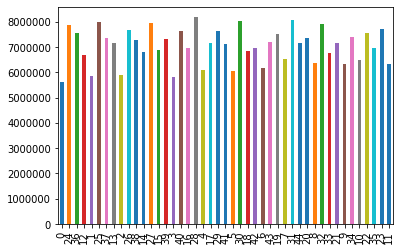

In [74]:
mon_sales['Hamburger'].plot(kind = 'bar')

In [75]:
south_west_col

['HM-SW', 'CF-SW', 'FF-SW']

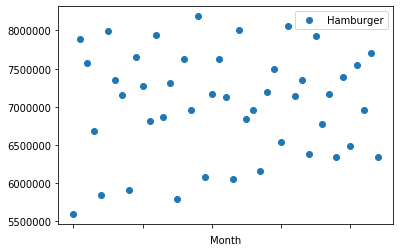

In [76]:
mon_sales.groupby('Year').apply(lambda x: x[['Month', 'Hamburger']]).plot(x='Month', y='Hamburger', style='o')

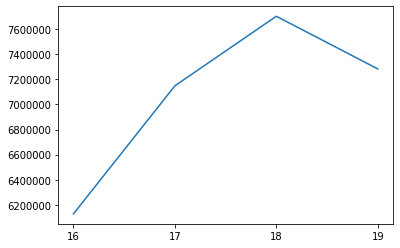

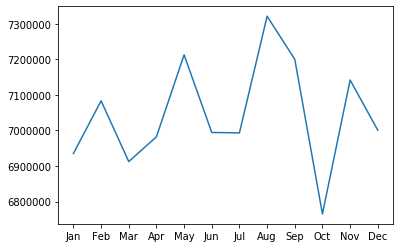

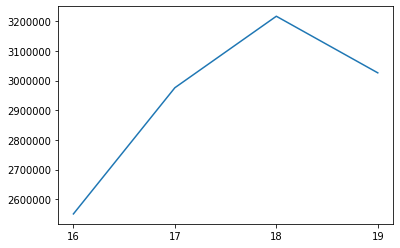

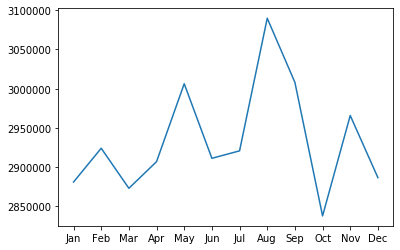

In [77]:
month_labels = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_labels_9 = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep']

ham_burger_year= mon_sales.groupby('Year').apply(lambda x: x['Hamburger'].mean())
plt.plot(ham_burger_year)
plt.xticks(ham_burger_year.index)
plt.show()

ham_burger_month = mon_sales.groupby('Month').apply(lambda x: x['Hamburger'].mean())
plt.plot(ham_burger_month.reindex(month_labels))
plt.xticks(ham_burger_month.index)

plt.show()

chicken_fillet_year= mon_sales.groupby('Year').apply(lambda x: x['chicken_fillet'].mean())
plt.plot(chicken_fillet_year)
plt.xticks(chicken_fillet_year.index)
plt.show()

chicken_fillet_month = mon_sales.groupby('Month').apply(lambda x: x['chicken_fillet'].mean())
plt.plot(chicken_fillet_month.reindex(month_labels))
plt.xticks(chicken_fillet_month.index)
plt.show()



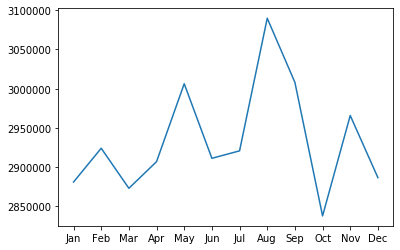

In [78]:
chicken_fillet_month = mon_sales.groupby('Month').apply(lambda x: x['chicken_fillet'].mean())
plt.plot(chicken_fillet_month.reindex(month_labels))
plt.xticks(chicken_fillet_month.index)
plt.show()



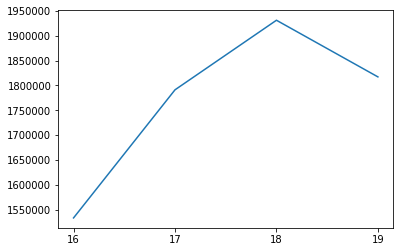

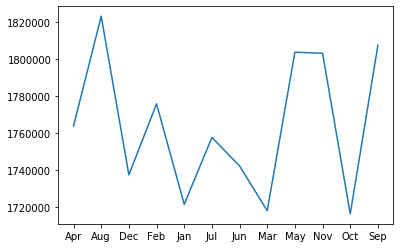

In [79]:
Fillet_fish_year= mon_sales.groupby('Year').apply(lambda x: x['Fillet_fish'].mean())
plt.plot(Fillet_fish_year)
plt.xticks(Fillet_fish_year.index)
plt.show()

Fillet_fish_month = mon_sales.groupby('Month').apply(lambda x: x['Fillet_fish'].mean())
plt.plot(Fillet_fish_month)
plt.xticks(Fillet_fish_month.index)
plt.show()



In [80]:
chicken_fillet_month.reindex(month_labels)

Month
Jan    2880963.25
Feb    2924033.50
Mar    2872976.50
Apr    2906950.50
May    3006324.50
Jun    2911208.25
Jul    2920737.00
Aug    3089858.75
Sep    3008079.75
Oct    2837738.00
Nov    2965773.00
Dec    2886519.00
dtype: float64

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
mon_sales.head()

,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,...,index,Hamburger,chicken_fillet,Fillet_fish,north_east,south_west,north_west,south_east,central,Total sales
0,1140955,494802,285238,1124565,468568,281141,1111618,482079,277904,1095034,...,1,5598648,2352671,1399660,1920995,1874274,1871601,1825056,1859053,9350979
24,1574815,656173,409773,1607493,643522,386113,1586799,661166,381143,1570926,...,1,7887763,3234631,1926117,2640761,2637128,2629108,2577139,2564375,13048511
36,1581146,632975,379785,1499626,650348,374906,1534569,639403,383642,1518435,...,1,7568561,3128423,1861751,2593906,2524880,2557614,2491027,2391308,12558735
12,1381012,575421,345253,1356550,565229,339137,1341018,558757,348938,1316604,...,1,6685774,2808128,1698295,2301686,2260916,2248713,2216731,2164151,11192197
1,1175529,489804,293882,1200559,480616,288369,1188037,475603,297009,1167009,...,2,5840210,2394392,1448157,1959215,1969544,1960649,1933574,1859777,9682759


Month
Jan    12558735.0
Feb    12278447.0
Mar    12074324.0
Apr    12250084.0
May    12686117.0
Jun    11798203.0
Jul    11547979.0
Aug    11954952.0
Sep    11981653.0
Oct           NaN
Nov           NaN
Dec           NaN
dtype: float64

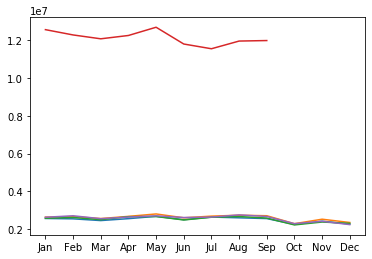

In [149]:
Fillet_fish_year_19= mon_sales[mon_sales['Year'] == '19'].groupby('Month').apply(lambda x: x['Total sales'].sum()).reindex(month_labels)
Fillet_fish_year_18= mon_sales[mon_sales['Year'] == '18'].groupby('Month').apply(lambda x: x['south_west'].sum()).reindex(month_labels)
Fillet_fish_year_17= mon_sales[mon_sales['Year'] == '18'].groupby('Month').apply(lambda x: x['south_east'].sum()).reindex(month_labels)
Fillet_fish_year_16= mon_sales[mon_sales['Year'] == '18'].groupby('Month').apply(lambda x: x['central'].sum()).reindex(month_labels)
Fillet_fish_year_15= mon_sales[mon_sales['Year'] == '18'].groupby('Month').apply(lambda x: x['north_west'].sum()).reindex(month_labels)

Fillet_fish_year
plt.plot(Fillet_fish_year_16)
plt.plot(Fillet_fish_year_18)
plt.plot(Fillet_fish_year_17)
plt.plot(Fillet_fish_year_19)
plt.plot(Fillet_fish_year_15)

Fillet_fish_year_19

In [144]:
mon_sales[mon_sales['Year'] == '19']

,HM-NE,CF-NE,FF-NE,HM-SW,CF-SW,FF-SW,HM-NW,CF-NW,FF-NW,HM-SE,...,index,Hamburger,chicken_fillet,Fillet_fish,north_east,south_west,north_west,south_east,central,Total sales
36,1581146,632975,379785,1499626,650348,374906,1534569,639403,383642,1518435,...,1,7568561,3128423,1861751,2593906,2524880,2557614,2491027,2391308,12558735
37,1503795,626581,375948,1537661,615567,384415,1460434,608514,365108,1432313,...,2,7350256,3061564,1866627,2506324,2537643,2434056,2401803,2398621,12278447
38,1519140,608152,379785,1444534,626456,375873,1474888,590437,354262,1453373,...,3,7267799,3003545,1802980,2507077,2446863,2419587,2384291,2316506,12074324
39,1488760,620316,387381,1524090,635037,381022,1442209,600920,360552,1414702,...,4,7317841,3073157,1859086,2496457,2540149,2403681,2396331,2413466,12250084
40,1596480,665200,383468,1506271,627613,391937,1547080,619337,386770,1470550,...,5,7620829,3175075,1890213,2645148,2525821,2553187,2475925,2486036,12686117
41,1488759,620316,357594,1410073,587530,352518,1446819,579200,347520,1371090,...,6,7124175,2921766,1752262,2466669,2350121,2373539,2285149,2322725,11798203
42,1458378,583828,364594,1379296,598164,344824,1416344,567000,340200,1336287,...,7,6956441,2852679,1738859,2406800,2322284,2323544,2240780,2254571,11547979
43,1502572,601520,360912,1422314,616820,355578,1462348,585417,351250,1386752,...,8,7190660,2995435,1768857,2465004,2394712,2399015,2348987,2347234,11954952
44,1458379,607658,379476,1431260,620699,372419,1472377,589432,353659,1397616,...,9,7142860,3023767,1815026,2445513,2424378,2415468,2367390,2328904,11981653


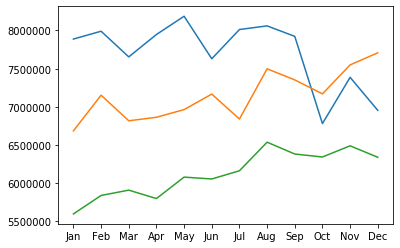

In [84]:
HAM_18= mon_sales[mon_sales['Year'] == '18'].groupby('Month').apply(lambda x: x['Hamburger'].sum()).reindex(month_labels)
HAM_17= mon_sales[mon_sales['Year'] == '17'].groupby('Month').apply(lambda x: x['Hamburger'].sum()).reindex(month_labels)
Ham_16= mon_sales[mon_sales['Year'] == '16'].groupby('Month').apply(lambda x: x['Hamburger'].sum()).reindex(month_labels)

mon_sales.
plt.plot(HAM_18)
plt.plot(HAM_17)
plt.plot(Ham_16)

In [192]:
mon_sales[mon_sales['Year'] == '19'].Fillet_fish.sum()/mon_sales[mon_sales['Year'] == '19']['Total sales'].sum()
#mon_sales.chicken_fillet.sum()/mon_sales['Total sales'].sum()




0.14987250951141118

[2639394,
 2704249,
 2615408,
 2637788,
 2754238,
 2670893,
 2288925,
 2416298,
 2239571,
 2557614,
 2434056,
 2419587,
 2403681,
 2553187,
 2373539,
 2323544,
 2399015,
 2415468]

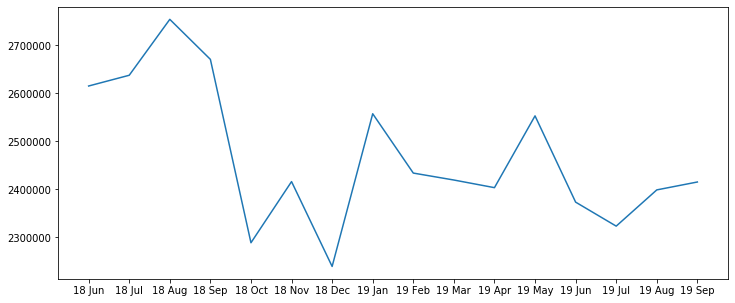

In [185]:
plt.figure(figsize=(12,5))
HAM_18= mon_sales[mon_sales['Year'] == '18'].groupby('Month').apply(lambda x: x['central'].sum()).reindex(month_labels)
Ham_19= mon_sales[mon_sales['Year'] == '19'].groupby('Month').apply(lambda x: x['south_east'].sum()).reindex(month_labels_9)
lst_18 = []
lst_19 = []
for i in range(len(HAM_18)):
    lst_18.append('18 '+ str(HAM_18.index[i]))
for i in range(len(Ham_19)):
    lst_19.append('19 '+ str(Ham_19.index[i]))
HAM_18.index = lst_18   
Ham_19.index = lst_19  
new = pd.concat([HAM_18.reindex(lst_18),Ham_19.reindex(lst_19)])

lst_18
plt.plot(new.iloc[5:])
new.iloc[3:].tolist()


In [86]:
new[new.index.duplicated()]



Series([], dtype: int64)